## Normalization Diff

In [1]:
# DAL ToolBox
# version 1.0.767

source("https://raw.githubusercontent.com/cefet-rj-dal/daltoolbox/main/jupyter.R")

#loading DAL
load_library("daltoolbox") 

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform




### Series for studying

In [2]:
data(sin_data)

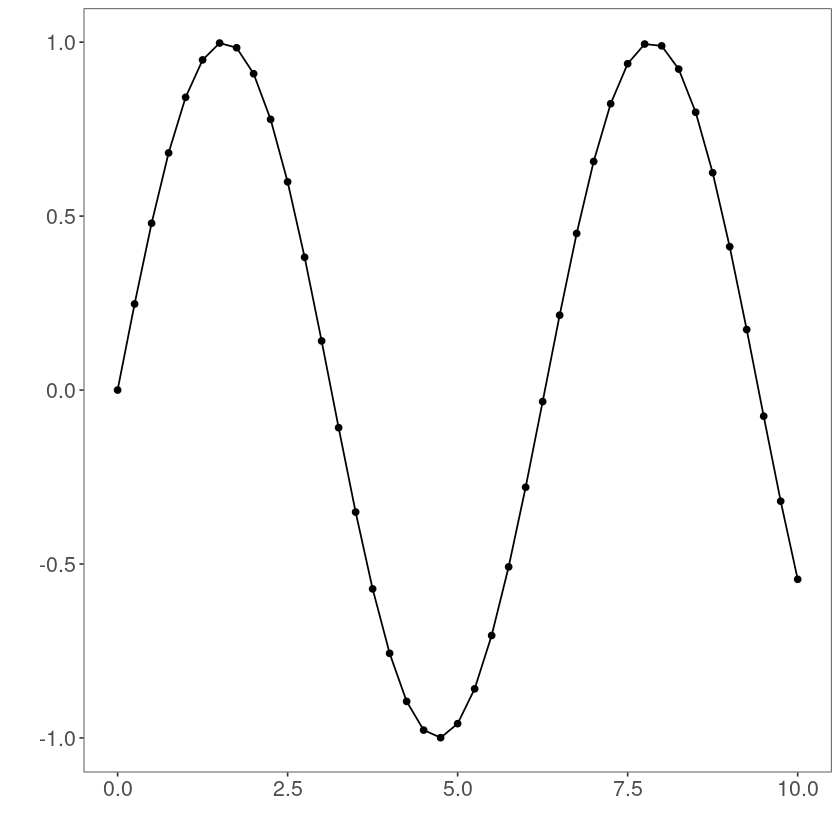

In [3]:
library(ggplot2)
plot_ts(x=sin_data$x, y=sin_data$y) + theme(text = element_text(size=16))

### sliding windows

In [4]:
sw_size <- 10
ts <- ts_data(sin_data$y, sw_size)
ts_head(ts, 3)
summary(ts[,10])

t9        t8        t7        t6        t5        t4        t3       
[1,] 0.0000000 0.2474040 0.4794255 0.6816388 0.8414710 0.9489846 0.9974950
[2,] 0.2474040 0.4794255 0.6816388 0.8414710 0.9489846 0.9974950 0.9839859
[3,] 0.4794255 0.6816388 0.8414710 0.9489846 0.9974950 0.9839859 0.9092974
     t2        t1        t0       
[1,] 0.9839859 0.9092974 0.7780732
[2,] 0.9092974 0.7780732 0.5984721
[3,] 0.7780732 0.5984721 0.3816610

       t0          
 Min.   :-0.99929  
 1st Qu.:-0.55091  
 Median : 0.05397  
 Mean   : 0.02988  
 3rd Qu.: 0.63279  
 Max.   : 0.99460  

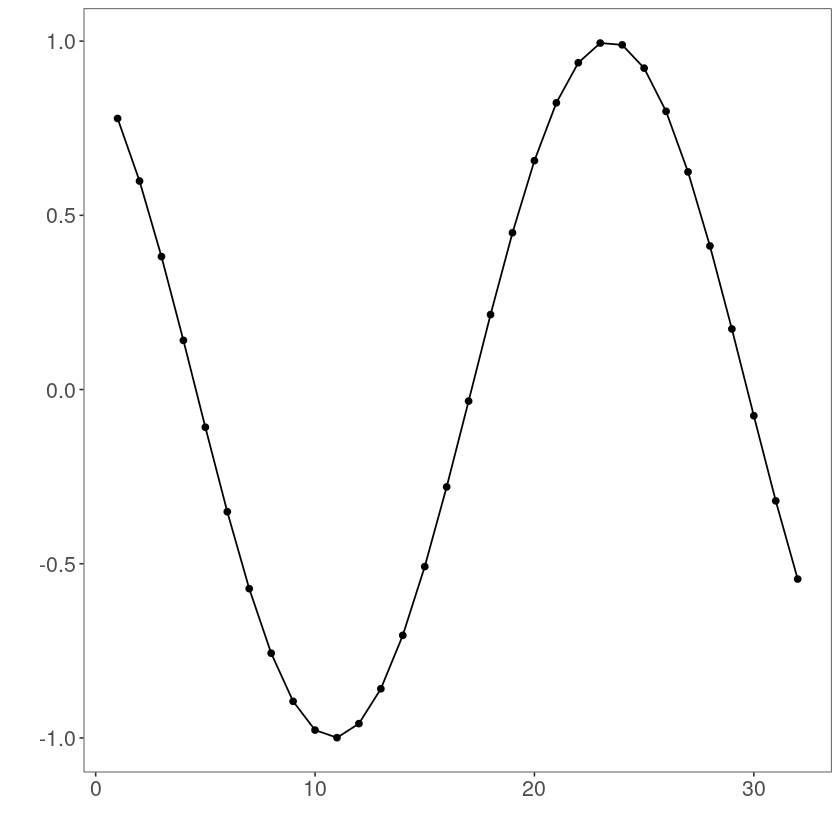

In [5]:
library(ggplot2)
plot_ts(y=ts[,10]) + theme(text = element_text(size=16))

### normalization

t8        t7        t6        t5        t4        t3        t2       
[1,] 0.9982009 0.9672887 0.9073861 0.8222178 0.7170790 0.5985067 0.4738732
[2,] 0.9672887 0.9073861 0.8222178 0.7170790 0.5985067 0.4738732 0.3509276
[3,] 0.9073861 0.8222178 0.7170790 0.5985067 0.4738732 0.3509276 0.2373141
     t1        t0        
[1,] 0.3509276 0.23731412
[2,] 0.2373141 0.14009662
[3,] 0.1400966 0.06531964

       t0         
 Min.   :0.00000  
 1st Qu.:0.06333  
 Median :0.29337  
 Mean   :0.40975  
 3rd Qu.:0.75129  
 Max.   :1.00000  

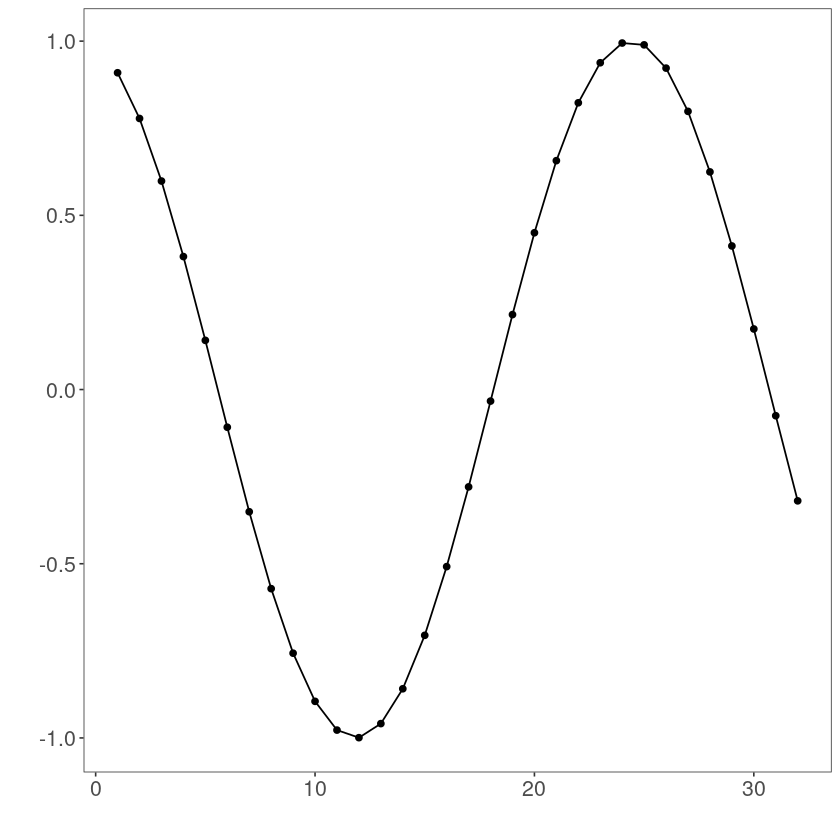

In [6]:
preproc <- ts_norm_diff()
preproc <- fit(preproc, ts)
tst <- transform(preproc, ts)
ts_head(tst, 3)
summary(tst[,9])
plot_ts(y=ts[,9]) + theme(text = element_text(size=16))